In [1]:
import numpy as np
from eryn.backends import HDFBackend as eryn_HDF_Backend
import matplotlib.pyplot as plt
import corner
import os
import warnings
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
plt.rcParams['font.size'] = 20

notebook_direc = os.getcwd()
samples_direc = notebook_direc

['MCMC_samps_for_fish_M_1e6_mu_10_a_0p998_e0_0p73_p0_7p7275_e0_0p73_pro_SNR_50_dt_5_T_2_eps_1e-5_recov_eps_1e-5_dt_5_T_2_TDI2_w_background_equal_arms.h5',
 'MCMC_samps_for_fish_M_1e6_mu_10_a_0p998_e0_0p73_p0_7p7275_e0_0p73_pro_SNR_50_dt_5_T_2_eps_0p0_recov_eps_1e-2_dt_5_T_2_TDI2_w_background_equal_arms.h5',
 'MCMC_samps_for_fish_M_1e6_mu_10_a_0p998_e0_0p73_p0_7p7275_e0_0p73_pro_SNR_50_dt_5_T_2_eps_0p0_recov_eps_1e-2_dt_5_T_2_TDI2_w_background_no_response.h5']

In [3]:
def corner_plot(burned_samples, true_params, param_labels, corner_kwargs, title = r'Corner plot', plot_name = None):
    N_params = len(param_labels)
    true_params = true_params[0:N_params]
    trunc_samples = burned_samples[0][:,:N_params]
    print(trunc_samples.shape)
    
    samples_corner = np.column_stack(trunc_samples)

    figure = corner.corner(trunc_samples,bins = 30, color = 'blue', **corner_kwargs)

    
    axes = np.array(figure.axes).reshape((N_params, N_params))

    for i in range(N_params):
        ax = axes[i, i]
        ax.axvline(true_params[i], color="k")

    for yi in range(N_params):
        for xi in range(yi):
            ax = axes[yi, xi]
            ax.axhline(true_params[yi], color="k")
            ax.axvline(true_params[xi],color= "k")
            ax.plot(true_params[xi], true_params[yi], "sk")

    for ax in figure.get_axes():
        ax.tick_params(axis='both', labelsize=18)

    blue_line = mlines.Line2D([], [], color='blue', label=r'Posterior Distributions')
    black_line = mlines.Line2D([], [], color='black', label='True Value')

    # plt.legend(handles=[blue_line,black_line], fontsize = 65, frameon = True, bbox_to_anchor=(0.25, N_params), loc="upper right", title = title, title_fontproperties = FontProperties(size = , weight = 'bold'))
    # plt.subplots_adjust(left=-0.1, bottom=-0.1, right=None, top=None, wspace=0.15, hspace=0.15)
    if plot_name:
        plt.savefig(plot_name, bbox_inches = "tight")
    return figure

import h5py
def load_samples_h5(file_path):
    with h5py.File(file_path, "r") as f:
        # Load parameter labels
        param_labels = [label.decode('utf-8') if isinstance(label, bytes) else label
                        for label in f["param_labels"][()]]

        # Load true values
        true_vals = f["true_values"][()]

        # Load samples into a dictionary
        samples_dict = {}
        for label in param_labels:
            samples_dict[label] = f[f"samples/{label}"][()]

    return samples_dict, param_labels, true_vals

In [4]:
loaded_samples, param_labels, true_vals = load_samples_h5(samples_direc + "/case_1_few.h5")
burned_samples_EMRI_1eneg5 = list(loaded_samples.values())

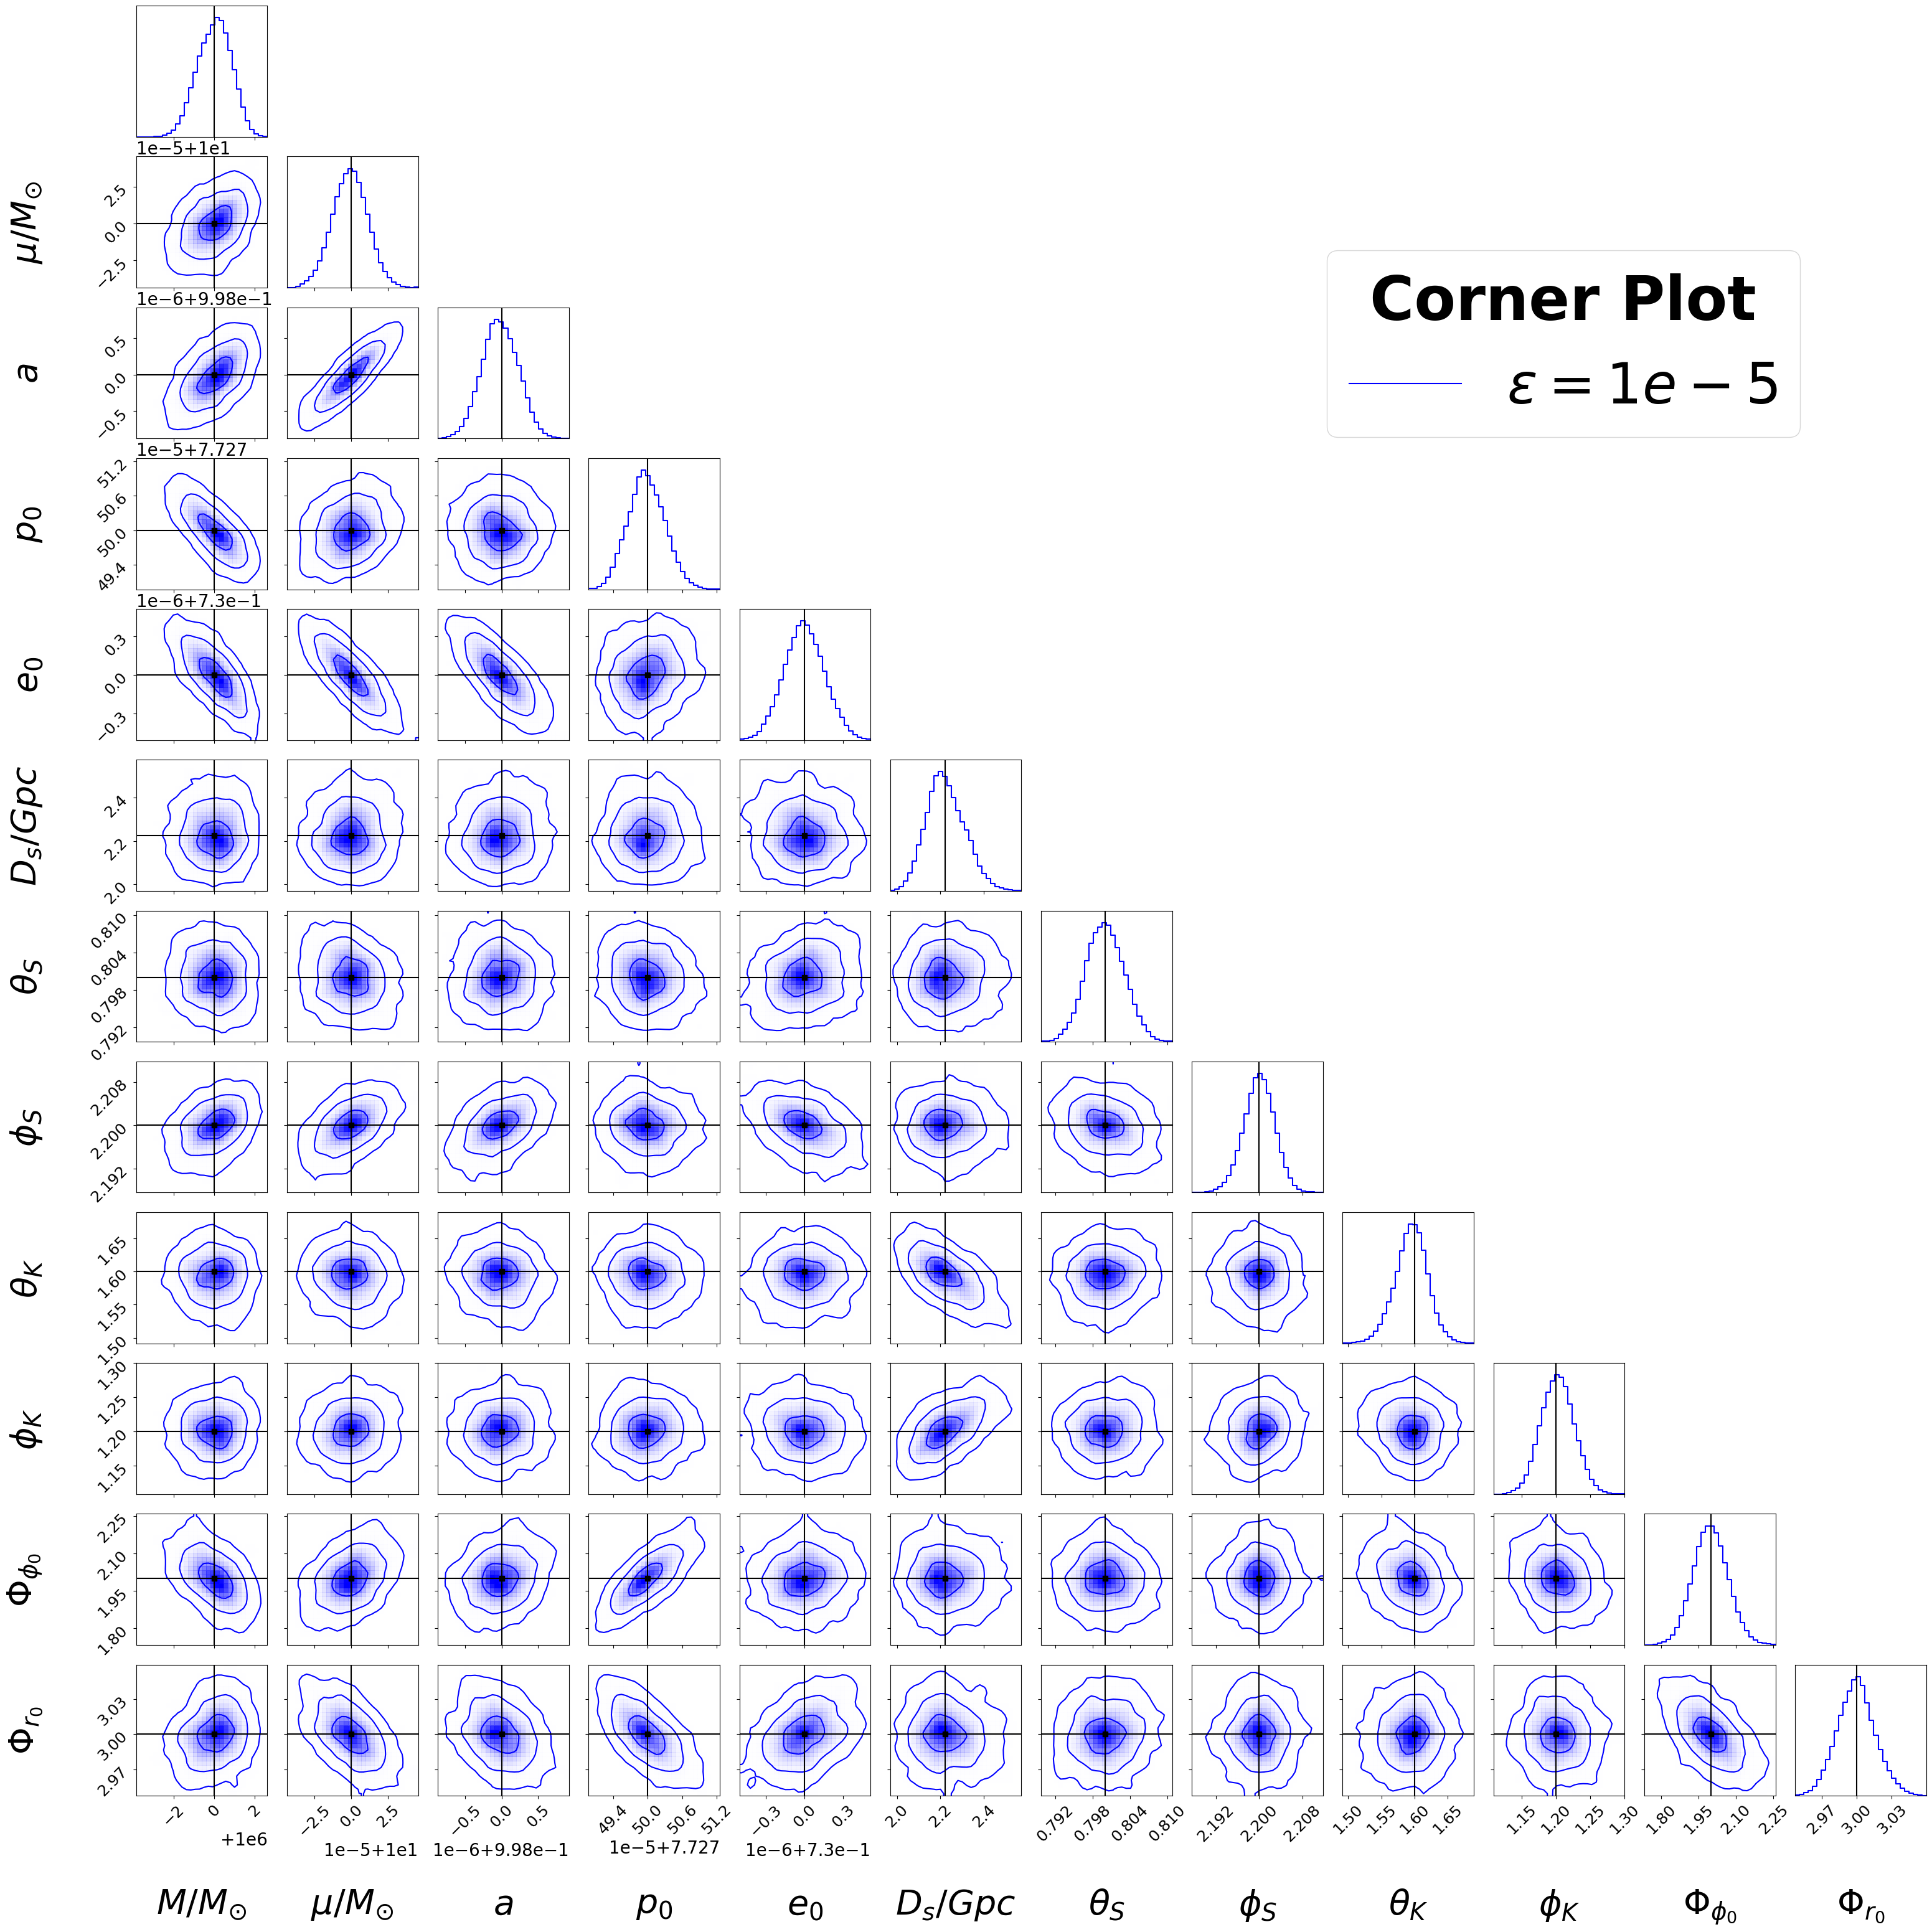

In [5]:
true_vals_EMRI_case_1 = true_vals

params_label_full = param_labels

# params_label_full = param_labels
N_params = len(params_label_full)
corner_kwargs = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_label_full, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=40), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)

samples_corner_case_1 = np.column_stack(burned_samples_EMRI_1eneg5)

figure = corner.corner(samples_corner_case_1, bins = 30, color = 'blue', **corner_kwargs)

# weights = (len(samples_corner_1eneg5[:,0])/len(samples_corner_1eneg2[:,0]))*np.ones(len(samples_corner_1eneg2[:,0]))
# corner.corner(samples_corner_1eneg2, fig = figure, bins = 30, weights = weights, color = 'red', **corner_kwargs)

axes = np.array(figure.axes).reshape((N_params, N_params))

for i in range(N_params):
    ax = axes[i, i]
    ax.axvline(true_vals_EMRI_case_1[i], color="k")

for yi in range(N_params):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axhline(true_vals_EMRI_case_1[yi], color="k")
        ax.axvline(true_vals_EMRI_case_1[xi],color= "k")
        ax.plot(true_vals_EMRI_case_1[xi], true_vals_EMRI_case_1[yi], "sk")

for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=18)
blue_line = mlines.Line2D([], [], color='blue', label=r'$\epsilon = 1e-5$')
# red_line = mlines.Line2D([], [], color='red', label=r'$\epsilon = 1e-2$')
# black_line = mlines.Line2D([], [], color='black', label='True Value')

plt.legend(handles=[blue_line], fontsize = 65, frameon = True, bbox_to_anchor=(0.25, N_params), loc="upper right", title = "Corner Plot", title_fontproperties = FontProperties(size = 70, weight = 'bold'))
# plt.legend(handles=[blue_line, red_line, black_line], fontsize = 65, frameon = True, bbox_to_anchor=(0.25, N_params), loc="upper right", title = "Corner Plot", title_fontproperties = FontProperties(size = 70, weight = 'bold'))

plt.subplots_adjust(left=-0.1, bottom=-0.1, right=None, top=None, wspace=0.15, hspace=0.15)

